In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
from scipy.stats import norm

df_tiantan = pd.read_csv("https://raw.githubusercontent.com/mvikic/air-quality-linear-regression/master/PRSA_Data_Tiantan_20130301-20170228.csv")
print(df_tiantan.shape)

(35064, 18)


In [2]:
print(df_tiantan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [3]:
df_tiantan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [4]:
a = df_tiantan.isnull().sum()/len(df_tiantan)*100
b = df_tiantan.isnull().sum()
print(a)
print(b)

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.930755
PM10       1.702601
SO2        3.188455
NO2        2.121834
CO         3.211271
O3         2.404175
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.222450
WSPM       0.039927
station    0.000000
dtype: float64
No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [5]:
df_tiantan.drop(['No'], inplace= True, axis = 1)
df_tiantan.drop(['wd'], inplace= True, axis = 1)
df_tiantan.drop(['station'], inplace= True, axis = 1)

In [6]:
#popunjavanje neispravnih podataka sa medijanom nije najbolja za ovu bazu,
#jer recimo NaN podatak izmedju manjih vrijednosti popuni sa 47 i onda imamo skokove u periodu od 3h 8,NaN,10 = 8,47,10
#df_tiantan['PM2.5'].fillna(df_tiantan['PM2.5'].median(), inplace = True)
#df_tiantan['PM10'].fillna(df_tiantan['PM10'].median(), inplace = True)
#df_tiantan['SO2'].fillna(df_tiantan['SO2'].median(), inplace = True)
#df_tiantan['NO2'].fillna(df_tiantan['NO2'].median(), inplace = True)
#df_tiantan['CO'].fillna(df_tiantan['CO'].median(), inplace = True)
#df_tiantan['O3'].fillna(df_tiantan['O3'].median(), inplace = True)

#metodom ffill polja koja nemaju validne vrijednosti popunjavaju se sa prvom prethodnom validnom vrijednoscu
df_tiantan['PM2.5'].fillna(method='ffill', inplace=True)
df_tiantan['PM10'].fillna(method='ffill', inplace=True)
df_tiantan['SO2'].fillna(method='ffill', inplace=True)
df_tiantan['NO2'].fillna(method='ffill', inplace=True)
df_tiantan['CO'].fillna(method='ffill', inplace=True)
df_tiantan['O3'].fillna(method='ffill', inplace=True)

a = df_tiantan.isnull().sum()/len(df_tiantan)*100
print(a)

year     0.000000
month    0.000000
day      0.000000
hour     0.000000
PM2.5    0.000000
PM10     0.000000
SO2      0.000000
NO2      0.000000
CO       0.000000
O3       0.000000
TEMP     0.057039
PRES     0.057039
DEWP     0.057039
RAIN     0.057039
WSPM     0.039927
dtype: float64


In [7]:
#drop
df_tiantan.dropna(inplace = True, axis=0)
a = df_tiantan.isnull().sum()/len(df_tiantan)*100
print(a)

year     0.0
month    0.0
day      0.0
hour     0.0
PM2.5    0.0
PM10     0.0
SO2      0.0
NO2      0.0
CO       0.0
O3       0.0
TEMP     0.0
PRES     0.0
DEWP     0.0
RAIN     0.0
WSPM     0.0
dtype: float64


In [8]:
df_tiantan.shape

(35044, 15)

In [9]:
print("NO2:")
print('Srednja vrijednost', df_tiantan['NO2'].mean())
print('Dinamicki opseg:', df_tiantan['NO2'].max() - df_tiantan['NO2'].min())
print('Medijan:', df_tiantan['NO2'].median())

NO2:
Srednja vrijednost 53.23928412852414
Dinamicki opseg: 239.0
Medijan: 47.0


In [10]:
df_tiantan.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000
mean,2014.661540,6.524455,15.726487,11.499486,82.257294,106.659748,14.475354,53.239284,1308.167047,56.465031,13.671490,1012.547419,2.447535,0.064020,1.860629
std,1.176666,3.447959,8.800813,6.922185,81.147603,90.452762,20.512208,32.001414,1184.522502,60.848632,11.458418,10.266059,13.810696,0.786282,1.280305
min,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.000000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,11.000000,58.000000,85.000000,7.000000,47.000000,900.000000,41.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,2016.000000,10.000000,23.000000,17.000000,114.000000,144.000000,17.000000,71.000000,1600.000000,81.868300,23.500000,1020.900000,15.000000,0.000000,2.400000
max,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [11]:
df_tiantan_month = df_tiantan.set_index('month').sort_values(by=['month'])
df_tiantan_year = df_tiantan.set_index('year').sort_values(by=['year'])
df_tiantan_day = df_tiantan.set_index('day').sort_values(by=['day'])

In [12]:
print('koef.asimetrije:  %.2f' % skew(df_tiantan_year.loc['2013':'2017','NO2']))
print('koef.spljoštenosti:  %.2f' % kurtosis(df_tiantan_year.loc['2013':'2017','NO2']))

koef.asimetrije:  1.07
koef.spljoštenosti:  1.40


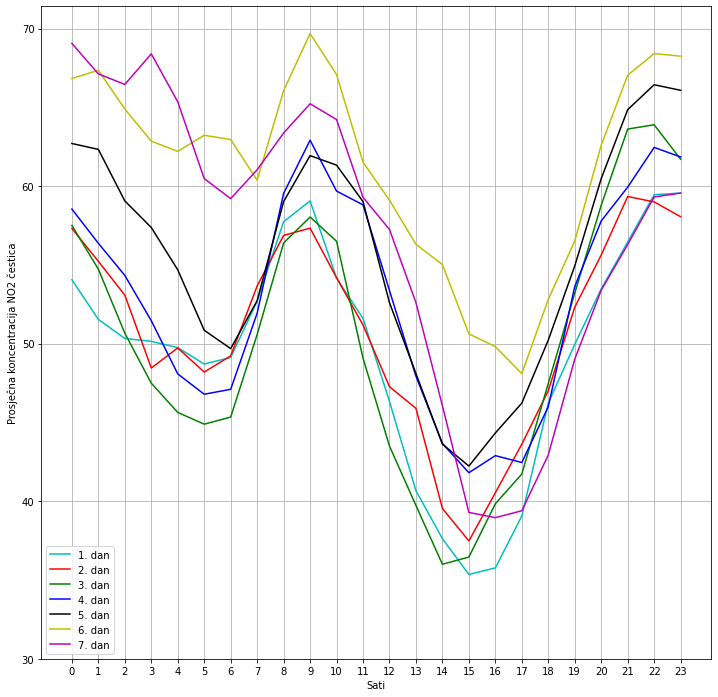

In [13]:
grupisan = df_tiantan.groupby(by=['day', 'hour']).mean()
dan_1 = grupisan.loc[10, 'NO2']
dan_2 = grupisan.loc[11, 'NO2']
dan_3 = grupisan.loc[12, 'NO2']
dan_4 = grupisan.loc[13, 'NO2']
dan_5 = grupisan.loc[14, 'NO2']
dan_6 = grupisan.loc[15, 'NO2']
dan_7 = grupisan.loc[16, 'NO2']
plt.figure(figsize=(12, 12))
plt.plot(np.arange(0,24,1), dan_1, 'c', label='1. dan')
plt.plot(np.arange(0,24,1), dan_2, 'r', label='2. dan')
plt.plot(np.arange(0,24,1), dan_3, 'g', label='3. dan')
plt.plot(np.arange(0,24,1), dan_4, 'b', label='4. dan')
plt.plot(np.arange(0,24,1), dan_5, 'k', label='5. dan')
plt.plot(np.arange(0,24,1), dan_6, 'y', label='6. dan')
plt.plot(np.arange(0,24,1), dan_7, 'm', label='7. dan')
plt.plot(np.arange(0,24,1), dan_1, 'c', label='1. dan')
plt.plot(np.arange(0,24,1), dan_2, 'r', label='2. dan')
plt.plot(np.arange(0,24,1), dan_3, 'g', label='3. dan')
plt.plot(np.arange(0,24,1), dan_4, 'b', label='4. dan')
plt.plot(np.arange(0,24,1), dan_5, 'k', label='5. dan')
plt.plot(np.arange(0,24,1), dan_6, 'y', label='6. dan')
plt.plot(np.arange(0,24,1), dan_7, 'm', label='7. dan')
plt.plot(np.arange(asignsd))

plt.ylabel('Prosječna koncentracija NO2 čestica')
plt.xlabel('Sati')
plt.xticks(range(0,24))
plt.yticks([30,40,50,60,70])
plt.legend()
plt.grid()

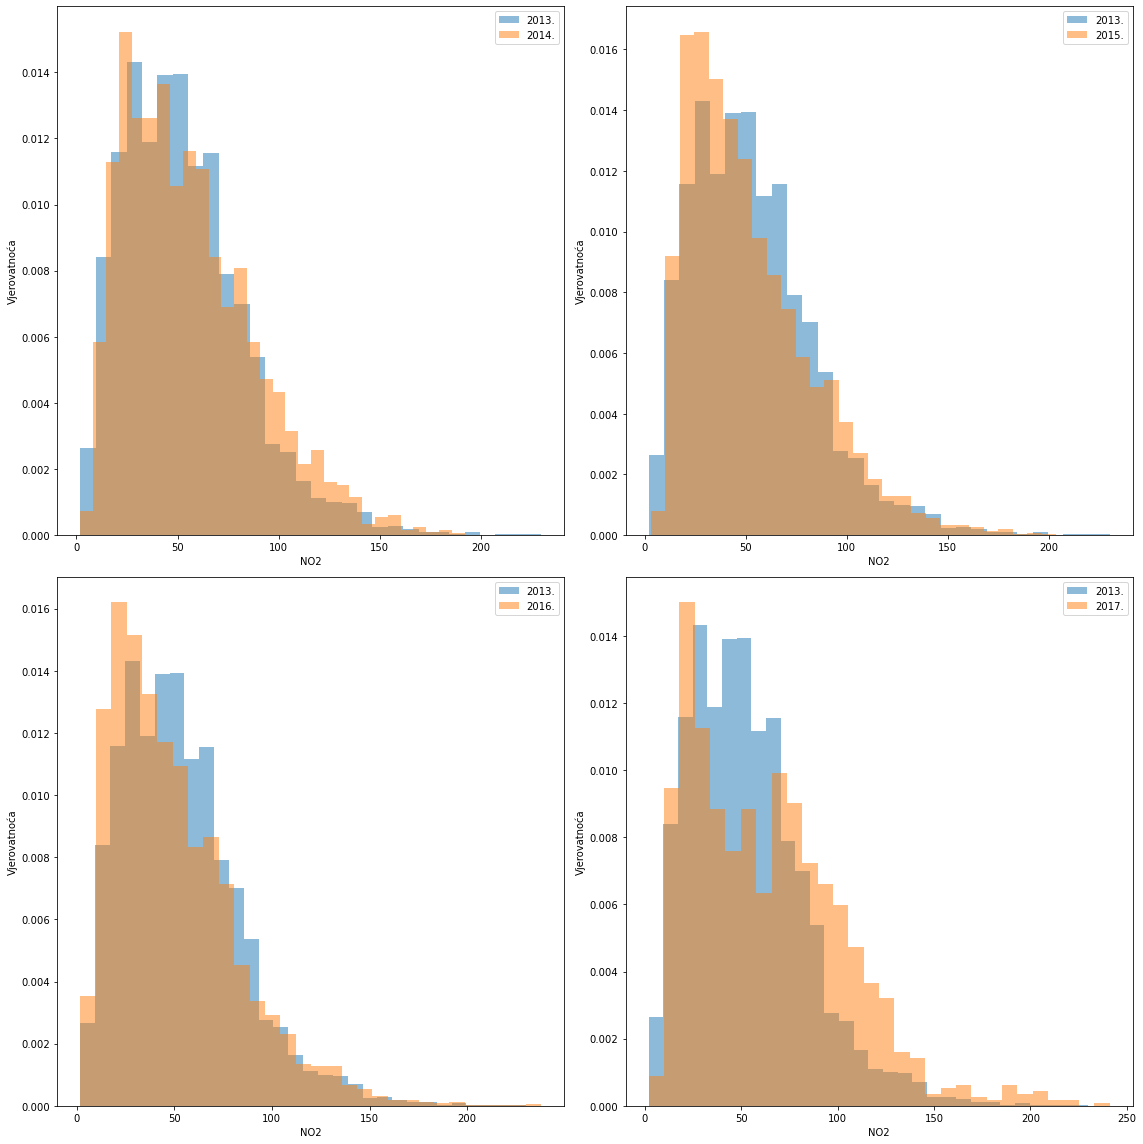

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16,16), sharex=False, sharey=False,
                        tight_layout=True)

axes[0,0].hist(df_tiantan_year.loc['2013','NO2'], bins=30, alpha=0.5, density=True, label='2013.')
axes[0,0].hist(df_tiantan_year.loc['2014','NO2'], bins=30, alpha=0.5, density=True, label='2014.')
axes[0,1].hist(df_tiantan_year.loc['2013','NO2'], bins=30, alpha=0.5, density=True, label='2013.')
axes[0,1].hist(df_tiantan_year.loc['2015','NO2'], bins=30, alpha=0.5, density=True, label='2015.')
axes[1,0].hist(df_tiantan_year.loc['2013','NO2'], bins=30, alpha=0.5, density=True, label='2013.')
axes[1,0].hist(df_tiantan_year.loc['2016','NO2'], bins=30, alpha=0.5, density=True, label='2016.')
axes[1,1].hist(df_tiantan_year.loc['2013','NO2'], bins=30, alpha=0.5, density=True, label='2013.')
axes[1,1].hist(df_tiantan_year.loc['2017','NO2'], bins=30, alpha=0.5, density=True, label='2017.')

axes[0,0].set_xlabel('NO2')
axes[0,0].set_ylabel('Vjerovatnoća')
axes[0,0].legend(loc='upper right')
axes[0,1].set_xlabel('NO2')
axes[0,1].set_ylabel('Vjerovatnoća')
axes[0,1].legend(loc='upper right')
axes[1,0].set_xlabel('NO2')
axes[1,0].set_ylabel('Vjerovatnoća')
axes[1,0].legend(loc='upper right')
axes[1,1].set_xlabel('NO2')
axes[1,1].set_ylabel('Vjerovatnoća')
axes[1,1].legend(loc='upper right')

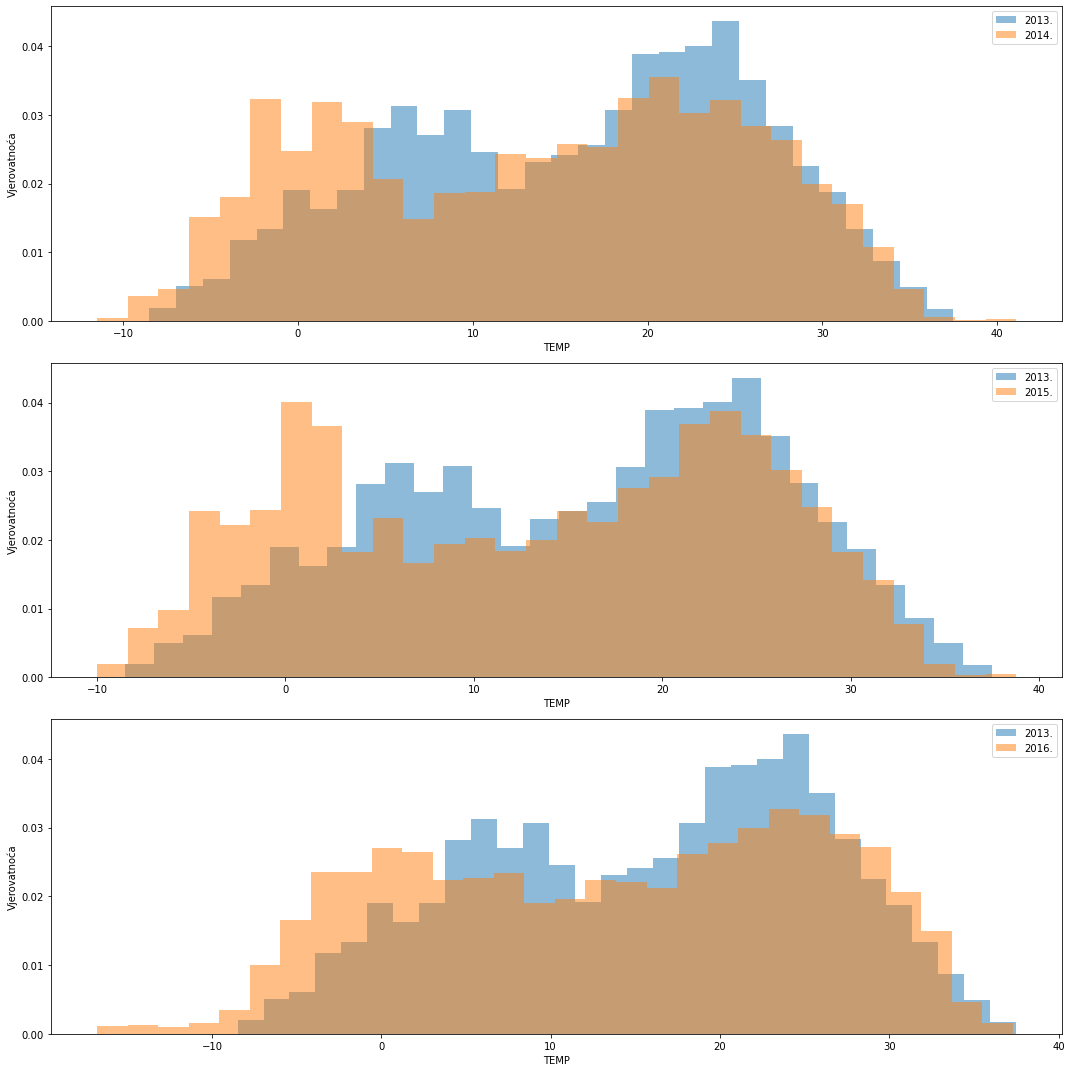

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=False, sharey=False, tight_layout=True)
axes[0].hist(df_tiantan_year.loc['2013','TEMP'], bins=30, alpha=0.5, density=True, label='2013.')
axes[0].hist(df_tiantan_year.loc['2014','TEMP'], bins=30, alpha=0.5, density=True, label='2014.')
axes[1].hist(df_tiantan_year.loc['2013','TEMP'], bins=30, alpha=0.5, density=True, label='2013.')
axes[1].hist(df_tiantan_year.loc['2015','TEMP'], bins=30, alpha=0.5, density=True, label='2015.')
axes[2].hist(df_tiantan_year.loc['2013','TEMP'], bins=30, alpha=0.5, density=True, label='2013.')
axes[2].hist(df_tiantan_year.loc['2016','TEMP'], bins=30, alpha=0.5, density=True, label='2016.')
#Fale podaci za 2017. godinu tako da imamo veliku razliku izmedju 
#axes[1,1].hist(df_tiantan_year.loc['2013','TEMP'], bins=30, alpha=0.5, density=True, label='2013.')
#axes[1,1].hist(df_tiantan_year.loc['2017','TEMP'], bins=30, alpha=0.5, density=True, label='2017.')

axes[0].set_xlabel('TEMP')
axes[0].set_ylabel('Vjerovatnoća')
axes[0].legend(loc='upper right')
axes[1].set_xlabel('TEMP')
axes[1].set_ylabel('Vjerovatnoća')
axes[1].legend(loc='upper right')
axes[2].set_xlabel('TEMP')
axes[2].set_ylabel('Vjerovatnoća')
axes[2].legend(loc='upper right')
#2017.
#axes[1,1].set_xlabel('TEMP')
#axes[1,1].set_ylabel('Vjerovatnoća')
#axes[1,1].legend(loc='upper right')

c:\users\mvikic\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


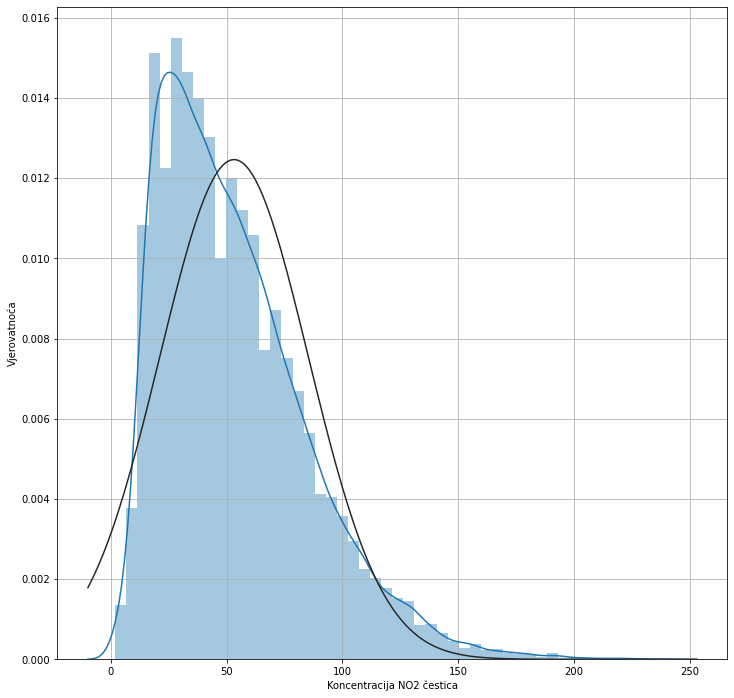

In [16]:
plt.figure(figsize=(12, 12))
NO2 = df_tiantan_year.loc['2013':'2017', 'NO2']
sb.distplot(NO2, fit=norm)
plt.xlabel('Koncentracija NO2 čestica')
plt.ylabel('Vjerovatnoća')
plt.grid()

Koeficijent asimetrije obiljezja CO: 2.54
Koeficijent spljoštenosti obiljezja CO: 9.20


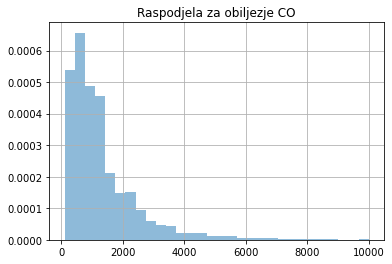

In [17]:
#Raspodjele za obiljelezja CO
plt.hist(df_tiantan['CO'], bins=30, density=True, alpha=0.5, label='CO')
plt.title('Raspodjela za obiljezje CO')
plt.grid()
print('Koeficijent asimetrije obiljezja CO: %.2f' % skew(df_tiantan['CO']))
print('Koeficijent spljoštenosti obiljezja CO: %.2f' % kurtosis(df_tiantan['CO']))

Koeficijent asimetrije obiljezja SO2: 3.27
Koeficijent spljoštenosti obiljezja SO2: 15.48


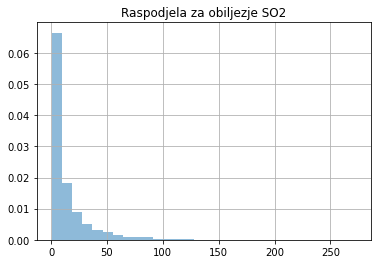

In [18]:
#Raspodjele za obiljelezja SO2
plt.hist(df_tiantan['SO2'], bins=30, density=True, alpha=0.5, label='SO2')
plt.title('Raspodjela za obiljezje SO2')
plt.grid()
print('Koeficijent asimetrije obiljezja SO2: %.2f' % skew(df_tiantan['SO2']))
print('Koeficijent spljoštenosti obiljezja SO2: %.2f' % kurtosis(df_tiantan['SO2']))

Koeficijent asimetrije obiljezja O3: 1.99
Koeficijent spljoštenosti obiljezja O3: 8.31


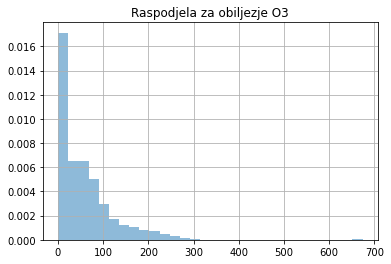

In [19]:
#Raspodjele za obiljelezja O3
plt.hist(df_tiantan['O3'], bins=30, density=True, alpha=0.5, label='O3')
plt.title('Raspodjela za obiljezje O3')
plt.grid()
print('Koeficijent asimetrije obiljezja O3: %.2f' % skew(df_tiantan['O3']))
print('Koeficijent spljoštenosti obiljezja O3: %.2f' % kurtosis(df_tiantan['O3']))

Koeficijent asimetrije obiljezja PRES: 0.10
Koeficijent spljoštenosti obiljezja PRES: -0.91


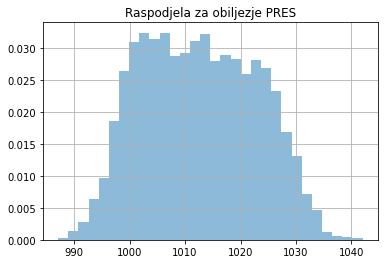

In [20]:
#Raspodjele za obiljelezja PRES
plt.hist(df_tiantan['PRES'], bins=30, density=True, alpha=0.5, label='PRES')
plt.title('Raspodjela za obiljezje PRES')
plt.grid()
print('Koeficijent asimetrije obiljezja PRES: %.2f' % skew(df_tiantan['PRES']))
print('Koeficijent spljoštenosti obiljezja PRES: %.2f' % kurtosis(df_tiantan['PRES']))

Koeficijent asimetrije obiljezja TEMP: -0.10
Koeficijent spljoštenosti obiljezja TEMP: -1.17


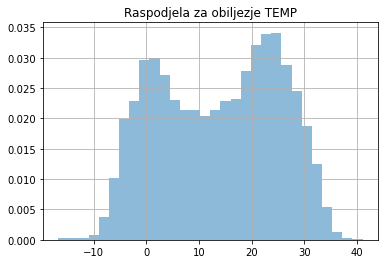

In [21]:
#Raspodjele za obiljelezja TEMP
plt.hist(df_tiantan['TEMP'], bins=30, density=True, alpha=0.5, label='TEMP')
plt.title('Raspodjela za obiljezje TEMP')
plt.grid()
print('Koeficijent asimetrije obiljezja TEMP: %.2f' % skew(df_tiantan['TEMP']))
print('Koeficijent spljoštenosti obiljezja TEMP: %.2f' % kurtosis(df_tiantan['TEMP']))

Koeficijent asimetrije obiljezja WSPM: 1.57
Koeficijent spljoštenosti obiljezja WSPM: 3.37


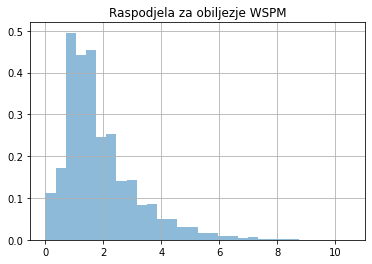

In [22]:
#Raspodjele za obiljelezja WSPM
plt.hist(df_tiantan['WSPM'], bins=30, density=True, alpha=0.5, label='WSPM')
plt.title('Raspodjela za obiljezje WSPM')
plt.grid()
print('Koeficijent asimetrije obiljezja WSPM: %.2f' % skew(df_tiantan['WSPM']))
print('Koeficijent spljoštenosti obiljezja WSPM: %.2f' % kurtosis(df_tiantan['WSPM']))

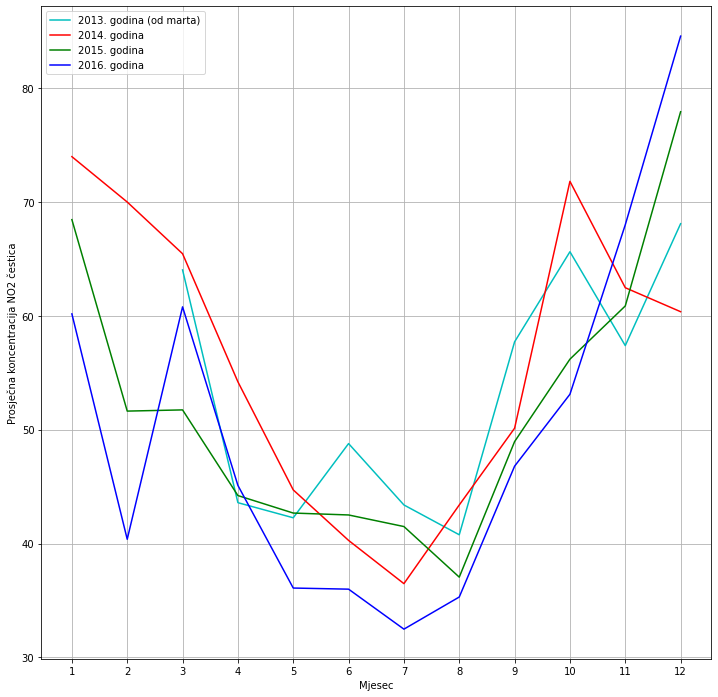

In [23]:
grupisan = df_tiantan.groupby(by=['year', 'month']).mean()
godina_13 = grupisan.loc[2013, 'NO2']
godina_14 = grupisan.loc[2014, 'NO2']
godina_15 = grupisan.loc[2015, 'NO2']
godina_16 = grupisan.loc[2016, 'NO2']
godina_17 = grupisan.loc[2017, 'NO2']
plt.figure(figsize=(12, 12))
plt.plot(np.arange(3,13,1), godina_13, 'c', label='2013. godina (od marta)')
plt.plot(np.arange(1,13,1), godina_14, 'r', label='2014. godina')
plt.plot(np.arange(1,13,1), godina_15, 'g', label='2015. godina')
plt.plot(np.arange(1,13,1), godina_16, 'b', label='2016. godina')

plt.ylabel('Prosječna koncentracija NO2 čestica')
plt.xlabel('Mjesec')
plt.legend()
plt.xticks(range(1,13))
plt.grid()

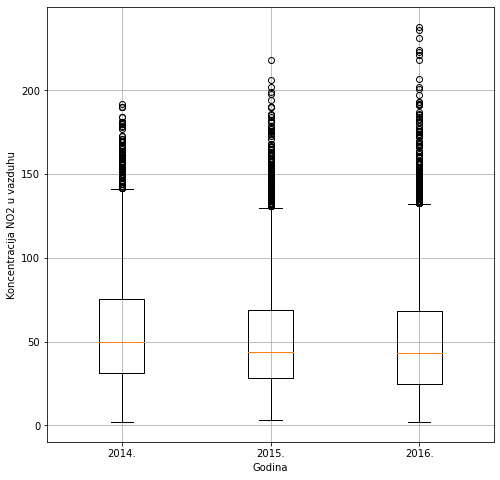

In [24]:
plt.figure(figsize=(8,8))
#ne plotujem 2013. i 2017. zbog nedostajucih mjeseci
plt.boxplot([df_tiantan_year.loc['2014', 'NO2'], df_tiantan_year.loc['2015', 'NO2'], df_tiantan_year.loc['2016', 'NO2']])
plt.xlabel('Godina')
plt.ylabel('Koncentracija NO2 u vazduhu')
plt.xticks([1,2,3], ['2014.', '2015.', '2016.'])
plt.grid()

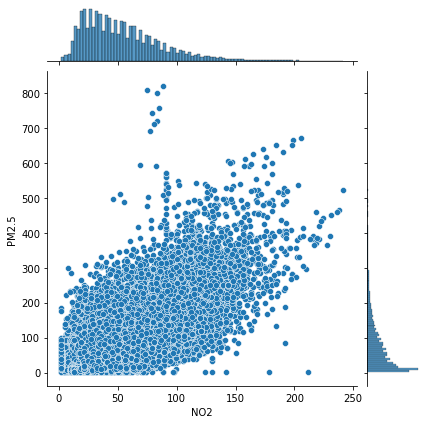

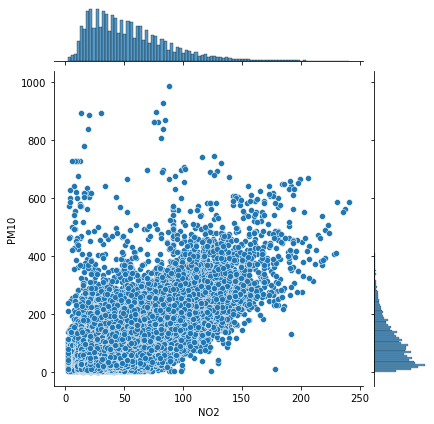

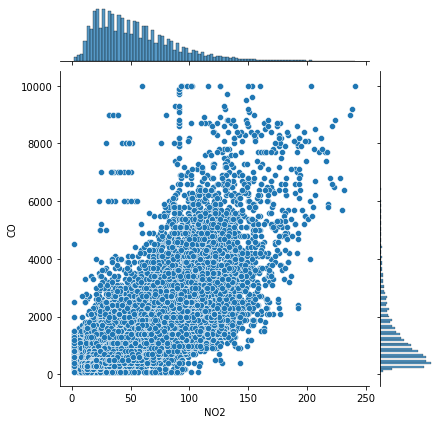

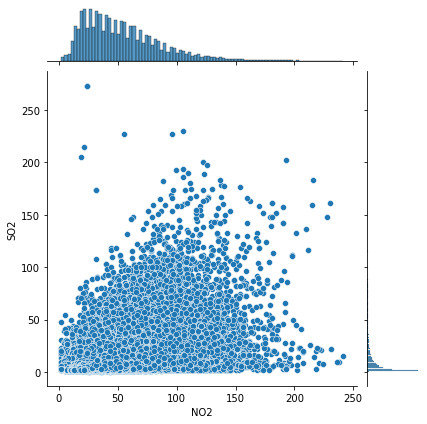

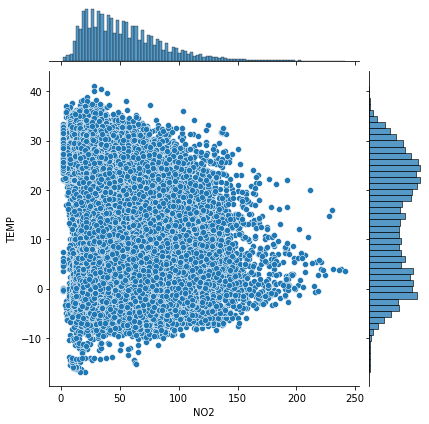

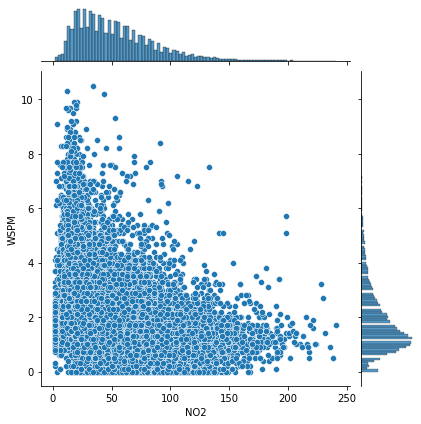

In [25]:
sb.jointplot(x=df_tiantan['NO2'], y=df_tiantan['PM2.5'])
sb.jointplot(x=df_tiantan['NO2'], y=df_tiantan['PM10'])
sb.jointplot(x=df_tiantan['NO2'], y=df_tiantan['CO'])
sb.jointplot(x=df_tiantan['NO2'], y=df_tiantan['SO2'])
sb.jointplot(x=df_tiantan['NO2'], y=df_tiantan['TEMP'])
sb.jointplot(x=df_tiantan['NO2'], y=df_tiantan['WSPM'])



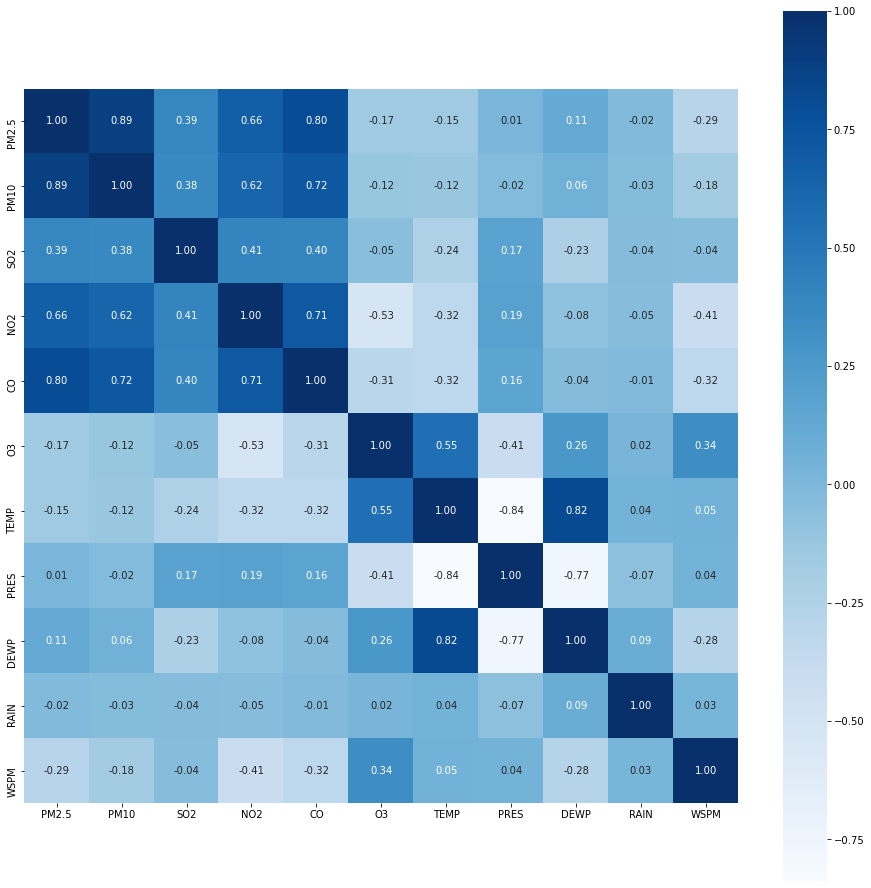

In [26]:
#toplotna mapa
f = plt.figure(figsize=(16, 16))
cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
cm1 = df_tiantan[cols].corr()
sb.heatmap(cm1, cmap="Blues", annot=True, square=True, fmt='.2f', yticklabels='auto', xticklabels='auto');
plt.show()

In [27]:
x = df_tiantan.drop(['NO2'], axis=1)
y = df_tiantan['NO2']
print(x.shape)
print(x.columns)
x.head()

(35044, 14)
Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'CO', 'O3',
       'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')


,year,month,day,hour,PM2.5,PM10,SO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,0,6.0,6.0,4.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,5.7
1,2013,3,1,1,6.0,29.0,5.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,3.9
2,2013,3,1,2,6.0,6.0,4.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,5.3
3,2013,3,1,3,6.0,6.0,4.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,4.9
4,2013,3,1,4,5.0,5.0,7.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,3.2


In [28]:
# podela skupa na trening i test podatke
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [29]:
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted) # np.mean((y_test-y_predicted)**2)
    mae = mean_absolute_error(y_test, y_predicted) # np.mean(np.abs(y_test-y_predicted))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

Mean squared error:  296.2582078828282
Mean absolute error:  12.703497121295499
Root mean squared error:  17.21215291248681
R2 score:  0.7073348459579757
R2 adjusted score:  0.7072048715842735
        y      y_pred
0    59.0   50.583735
1    18.0   29.237512
2    55.0   40.518965
3    41.0   46.321463
4    41.0   43.632117
5    79.0   59.655496
6    28.0   33.317765
7    72.0  107.666983
8    63.0   55.780650
9    13.0   19.521796
10   46.0   56.614465
11   28.0   42.453523
12   60.0   63.794578
13   53.0   75.370555
14  105.0   90.624459
15    8.0   23.921831
16   49.0   48.422620
17   17.0   23.243012
18   69.0   97.174069
19   15.0   24.338160
Koeficijenti:  [ 0.67090976  0.19360255  0.04889525  0.34793317  0.06311137  0.06171119
  0.23332379  0.00783738 -0.22698153  0.74843659 -0.01256096 -0.51383603
 -0.33535812 -4.27067714]


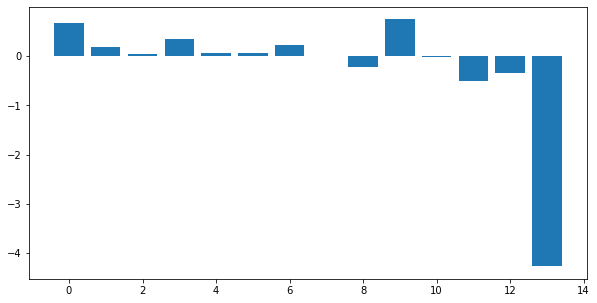

In [30]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)

# Obuka
first_regression_model.fit(x_train, y_train)

# Testiranje
y_predicted = first_regression_model.predict(x_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
print("Koeficijenti: ", first_regression_model.coef_)

In [31]:
# Selekcija obelezja
X = sm.add_constant(x_train)
model = sm.OLS(y_train, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     5479.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:13:38   Log-Likelihood:            -1.3463e+05
No. Observations:               31539   AIC:                         2.693e+05
Df Residuals:                   31524   BIC:                         2.694e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1305.2703    179.712     -7.263      0.000   -1657.513    -953.028
year           0.6709      0.090      7.451      0.000       0.494       0.847
month          0.1936      0.033      5.805      0.000       0.128       0.259
day            0.0489      0.011      4.402      0.000       0.027       0.071
hour           0.3479      0.015     23.016      0.000       0.318       0.378
PM2.5          0.0631      0.003     19.253      0.000       0.057       0.070
PM10           0.0617      0.002     24.771      0.000       0.057       0.067
SO2            0.2333      0.006     39.132      0.000       0.222       0.245
CO             0.0078      0.000     51.663      0.000       0.008       0.008
O3            -0.2270      0.002   -102.568      0.000      -0.231      -0.223
TEMP           0.7484      0.025     29.783      0.000       0.699       0.798
PRES          -0.0126      0.019     -0.649      0.516      -0.050       0.025
DEWP          -0.5138      0.018    -28.515      0.000      -0.549      -0.479
RAIN          -0.3354      0.125     -2.676      0.007      -0.581      -0.090
WSPM          -4.2707      0.095    -44.845      0.000      -4.457      -4.084
==============================================================================
Omnibus:                     4873.766   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31555.137
Skew:                           0.583   Prob(JB):                         0.00
Kurtosis:                       7.760   Cond. No.                     4.97e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
x = x.drop(['PRES'], axis=1)
x = x.drop(['RAIN'], axis=1)
x_train = x_train.drop(['PRES'], axis=1)
x_train = x_train.drop(['RAIN'], axis=1)
x_test = x_test.drop(['PRES'], axis=1)
x_test = x_test.drop(['RAIN'], axis=1)


# Standardizacija obelezja (svodjenje na sr.vr. 0 i varijansu 1)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,year,month,day,hour,PM2.5,PM10,SO2,CO,O3,TEMP,DEWP,WSPM
0,1.137771,-1.313670,0.937820,-0.649520,-0.472190,-0.694164,-0.513277,-0.091631,-0.810450,-1.884266,-1.346071,-0.592117
1,0.287657,-1.603803,1.164998,-0.794063,1.643789,1.205929,-0.415394,1.849385,-0.843204,-1.631129,-0.664590,-1.137478
2,-0.562457,-1.313670,-1.106782,1.229538,0.413569,0.277977,3.450980,0.583505,-0.335508,-1.238330,-0.664590,0.031152
3,0.287657,-0.443272,1.619354,-0.938606,0.056805,-0.219140,-0.611160,-0.091631,-0.875959,0.280490,0.952114,-0.747935
4,1.137771,0.717260,-1.333960,-0.215891,0.548893,0.222742,-0.219629,0.161545,0.368715,1.092274,1.256605,-0.592117


In [33]:
# Selekcija obelezja
X = sm.add_constant(x_train)
model = sm.OLS(y_train, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     6391.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:13:38   Log-Likelihood:            -1.3463e+05
No. Observations:               31539   AIC:                         2.693e+05
Df Residuals:                   31526   BIC:                         2.694e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1296.1394    179.608     -7.216      0.000   -1648.179    -944.100
year           0.6600      0.089      7.406      0.000       0.485       0.835
month          0.1890      0.032      5.917      0.000       0.126       0.252
day            0.0485      0.011      4.378      0.000       0.027       0.070
hour           0.3459      0.015     22.975      0.000       0.316       0.375
PM2.5          0.0631      0.003     19.303      0.000       0.057       0.070
PM10           0.0620      0.002     25.071      0.000       0.057       0.067
SO2            0.2329      0.006     39.221      0.000       0.221       0.245
CO             0.0078      0.000     51.809      0.000       0.008       0.008
O3            -0.2271      0.002   -102.665      0.000      -0.231      -0.223
TEMP           0.7622      0.022     34.301      0.000       0.719       0.806
DEWP          -0.5182      0.017    -29.693      0.000      -0.552      -0.484
WSPM          -4.2923      0.095    -45.261      0.000      -4.478      -4.106
==============================================================================
Omnibus:                     4880.834   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31652.359
Skew:                           0.583   Prob(JB):                         0.00
Kurtosis:                       7.767   Cond. No.                     4.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean squared error:  296.5062310099412
Mean absolute error:  12.70986616991967
Root mean squared error:  17.21935628907019
R2 score:  0.7070898308840601
R2 adjusted score:  0.7069783380835337
        y      y_pred
0    59.0   50.630510
1    18.0   29.213034
2    55.0   40.543770
3    41.0   46.428780
4    41.0   43.662541
5    79.0   59.648014
6    28.0   33.231477
7    72.0  107.575335
8    63.0   55.752613
9    13.0   19.503395
10   46.0   56.477850
11   28.0   42.388732
12   60.0   63.615229
13   53.0   75.284237
14  105.0   90.717133
15    8.0   23.982119
16   49.0   48.274091
17   17.0   23.207393
18   69.0   97.099704
19   15.0   24.199341
koeficijenti:  [  0.77637041   0.65145012   0.42690835   2.39300937   5.13171139
   5.61082388   4.75959563   9.29196772 -13.86703227   8.73233422
  -7.14803343  -5.50938207]


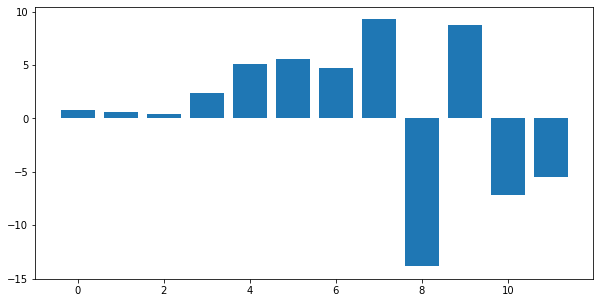

In [34]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
regression_model_std = LinearRegression()

# Obuka modela
regression_model_std.fit(x_train_std, y_train)

# Testiranje
y_predicted = regression_model_std.predict(x_test_std)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_std.coef_)),regression_model_std.coef_)
print("koeficijenti: ", regression_model_std.coef_)

Mean squared error:  296.50632101560217
Mean absolute error:  12.709860428140802
Root mean squared error:  17.21935890257248
R2 score:  0.7070897419699982
R2 adjusted score:  0.7069782491356278
        y      y_pred
0    59.0   50.630691
1    18.0   29.213532
2    55.0   40.543673
3    41.0   46.428164
4    41.0   43.662489
5    79.0   59.648277
6    28.0   33.230420
7    72.0  107.574682
8    63.0   55.752219
9    13.0   19.503088
10   46.0   56.478815
11   28.0   42.389138
12   60.0   63.615163
13   53.0   75.284651
14  105.0   90.716871
15    8.0   23.982869
16   49.0   48.273924
17   17.0   23.206572
18   69.0   97.099576
19   15.0   24.200606
koeficijenti:  [ 0.65991667  0.188985    0.04849279  0.34589346  0.0631326   0.06198136
  0.23294144  0.00784178 -0.22710709  0.76218776 -0.51816607 -4.29162916]


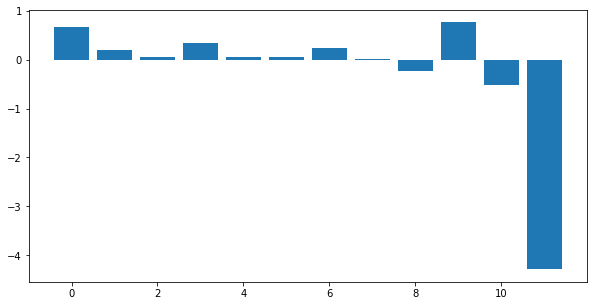

In [35]:
# Ridge regresija

# Inicijalizacija
ridge_model = Ridge(alpha=5)

# Obuka modela
ridge_model.fit(x_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

Mean squared error:  296.5063980226963
Mean absolute error:  12.709857870097952
Root mean squared error:  17.21936113863393
R2 score:  0.7070896658968551
R2 adjusted score:  0.7069781730335284
        y      y_pred
0    59.0   50.630651
1    18.0   29.213052
2    55.0   40.543930
3    41.0   46.427386
4    41.0   43.660852
5    79.0   59.648820
6    28.0   33.230809
7    72.0  107.573140
8    63.0   55.752577
9    13.0   19.501915
10   46.0   56.480746
11   28.0   42.388305
12   60.0   63.616365
13   53.0   75.285511
14  105.0   90.718258
15    8.0   23.983771
16   49.0   48.272981
17   17.0   23.206991
18   69.0   97.098321
19   15.0   24.200517
Koeficijenti:  [ 0.65908165  0.1887989   0.0484802   0.34588933  0.06313083  0.06198157
  0.23292225  0.00784191 -0.22710523  0.76208265 -0.51808469 -4.29121885]


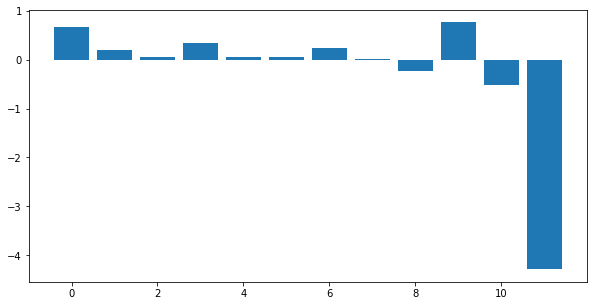

In [36]:
# Lasso regresija

# Model initialization
lasso_model = Lasso(alpha=0.001)

# Fit the data(train the model)
lasso_model.fit(x_train, y_train)

# Predict
y_predicted = lasso_model.predict(x_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("Koeficijenti: ", lasso_model.coef_)

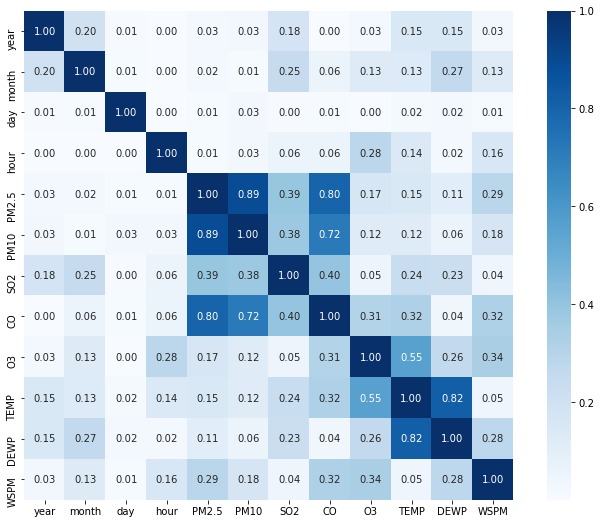

In [37]:
corr = x.corr()
f = plt.figure(figsize=(12, 9))
sb.heatmap(corr.abs(), cmap="Blues", annot=True, square=True, fmt='.2f', yticklabels='auto', xticklabels='auto');

Mean squared error:  221.80204142450242
Mean absolute error:  11.01266065514418
Root mean squared error:  14.893019889347574
R2 score:  0.7808879994102603
R2 adjusted score:  0.7803447465162362
        y      y_pred
0    59.0   56.483038
1    18.0   22.411219
2    55.0   39.677798
3    41.0   46.042747
4    41.0   36.781200
5    79.0   66.764718
6    28.0   28.561131
7    72.0  108.277927
8    63.0   49.947482
9    13.0   14.667098
10   46.0   55.465557
11   28.0   44.932955
12   60.0   71.361882
13   53.0   74.847428
14  105.0   85.278875
15    8.0   16.085463
16   49.0   48.728594
17   17.0   17.272786
18   69.0   97.029735
19   15.0   21.920310
koeficijenti:  [  0.09716018   1.52713689   0.56215467   2.01089057   9.00941593
   7.58133749   1.86513795  11.19215755 -17.81507898  17.14374195
 -16.75614547  -4.04978686   0.32145935   0.07622196   0.02537899
   0.48475411  -0.57483317   0.28524054   0.26003557  -1.41082208
   1.23840968  -0.78367955  -0.37323257   0.17426993   0.12802288

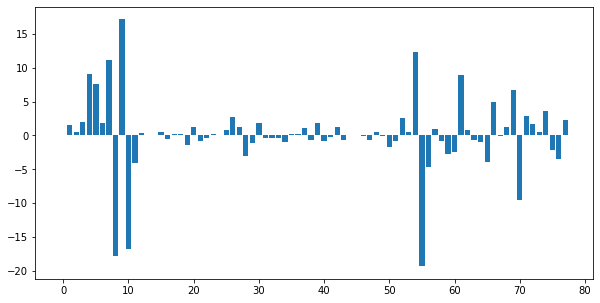

In [38]:
# Lin. regresija sa drugacijom hipotezom

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...

# Inicijalizacija
regression_model_inter = LinearRegression()

# Obuka modela
regression_model_inter.fit(x_inter_train, y_train)

# Testiranje
y_predicted = regression_model_inter.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
print("koeficijenti: ", regression_model_inter.coef_)

Mean squared error:  221.85965216777953
Mean absolute error:  11.014984121776404
Root mean squared error:  14.894953916269078
R2 score:  0.7808310873767468
R2 adjusted score:  0.7802876933785073
        y      y_pred
0    59.0   56.463088
1    18.0   22.455633
2    55.0   39.669863
3    41.0   46.011749
4    41.0   36.794890
5    79.0   66.734444
6    28.0   28.576693
7    72.0  108.306823
8    63.0   49.954092
9    13.0   14.671626
10   46.0   55.508721
11   28.0   44.913515
12   60.0   71.353031
13   53.0   74.818237
14  105.0   85.287003
15    8.0   16.127066
16   49.0   48.719225
17   17.0   17.237411
18   69.0   97.023816
19   15.0   21.921765
koeficijenti:  [  0.10341737   1.52575622   0.56211483   2.01398033   8.96982316
   7.58062879   1.89184879  11.18168361 -17.78508859  17.04912389
 -16.66169553  -4.03978278   0.31923273   0.07519353   0.02711116
   0.4929862   -0.57751256   0.29414998   0.25554741  -1.40932115
   1.24077853  -0.78610671  -0.37538403   0.17382692   0.1296908

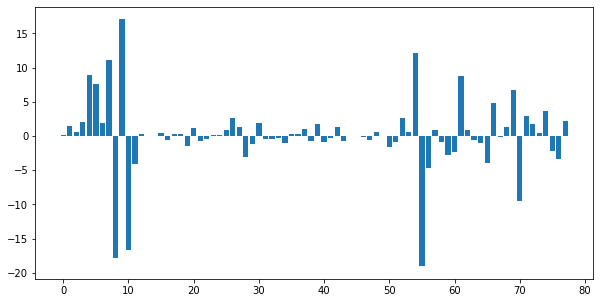

In [39]:
# Ridge regresija

# Inicijalizacija
ridge_model = Ridge(alpha=5)

# Obuka modela
ridge_model.fit(x_inter_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

Mean squared error:  221.80810098949988
Mean absolute error:  11.013127662881859
Root mean squared error:  14.893223324368028
R2 score:  0.7808820133363686
R2 adjusted score:  0.780338745600839
        y      y_pred
0    59.0   56.481163
1    18.0   22.433343
2    55.0   39.677715
3    41.0   46.022018
4    41.0   36.785283
5    79.0   66.746124
6    28.0   28.575280
7    72.0  108.282253
8    63.0   49.960585
9    13.0   14.684091
10   46.0   55.474304
11   28.0   44.930677
12   60.0   71.352384
13   53.0   74.829919
14  105.0   85.295131
15    8.0   16.088363
16   49.0   48.726936
17   17.0   17.266993
18   69.0   97.055139
19   15.0   21.924353
Koeficijenti:  [  0.09759769   1.5262868    0.56125006   2.01215676   8.99941252
   7.58016552   1.87290587  11.17966966 -17.79699228  17.09814245
 -16.71178532  -4.04466867   0.31708293   0.073818     0.02522199
   0.47458757  -0.56606096   0.28916498   0.25650622  -1.40560043
   1.22046712  -0.76525054  -0.36969702   0.17153993   0.1289865


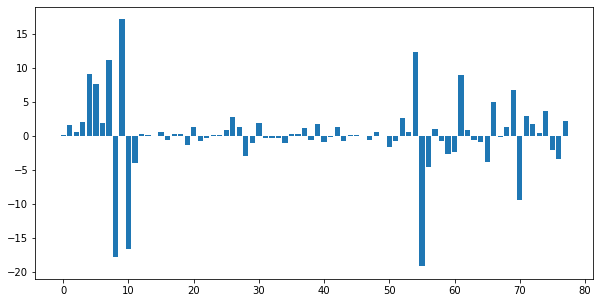

In [40]:
# Lasso regresija

# Model initialization
lasso_model = Lasso(alpha=0.001)

# Fit the data(train the model)
lasso_model.fit(x_inter_train, y_train)

# Predict
y_predicted = lasso_model.predict(x_inter_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("Koeficijenti: ", lasso_model.coef_)

Mean squared error:  152.6648355948116
Mean absolute error:  8.957821916885091
Root mean squared error:  12.355761230891911
R2 score:  0.8491867012041505
R2 adjusted score:  0.8469839847695437
        y      y_pred
0    59.0   51.826620
1    18.0   24.773620
2    55.0   42.084521
3    41.0   41.724145
4    41.0   36.589034
5    79.0   72.311089
6    28.0   20.223497
7    72.0  105.045353
8    63.0   48.284740
9    13.0   12.390267
10   46.0   53.376717
11   28.0   41.179066
12   60.0   67.618999
13   53.0   58.036446
14  105.0   98.691616
15    8.0    7.795803
16   49.0   52.115323
17   17.0   24.132060
18   69.0   98.685722
19   15.0   23.473811
koeficijenti:  [ 4.54049599e+00 -6.49247915e-01 -4.81909983e-01  7.16215914e+00
  1.08893566e+01  4.79624322e+00  2.44497661e+00  1.33984790e+01
 -2.37394765e+01  2.21448941e+01 -9.73409006e+00 -3.85232823e+00
 -1.21369249e+00 -8.42176550e-01  5.93424796e-02 -5.14021530e-01
 -1.31943809e-02  7.71457323e-01  2.41168243e-01  9.15169680e-01
 -1.4

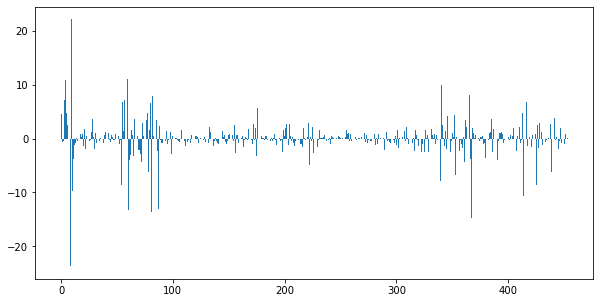

In [41]:
#Lin. regresija sa drugacijom hipotezom
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...+d1x1^2+d2x2^2+...+dnxn^2

# Inicijalizacija
regression_model_degree = LinearRegression()

# Obuka modela
regression_model_degree.fit(x_inter_train, y_train)

# Testiranje
y_predicted = regression_model_degree.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_degree.coef_)),regression_model_degree.coef_)
print("koeficijenti: ", regression_model_degree.coef_)

Mean squared error:  152.42003887946544
Mean absolute error:  8.95737960894758
Root mean squared error:  12.345851079592101
R2 score:  0.8494285289965947
R2 adjusted score:  0.8472293445983337
        y      y_pred
0    59.0   51.713001
1    18.0   24.668116
2    55.0   42.081194
3    41.0   41.684524
4    41.0   36.656817
5    79.0   72.243808
6    28.0   20.244862
7    72.0  105.198747
8    63.0   48.374854
9    13.0   12.338779
10   46.0   53.610321
11   28.0   41.087197
12   60.0   67.560451
13   53.0   58.124269
14  105.0   98.690956
15    8.0    8.096630
16   49.0   51.998197
17   17.0   24.179772
18   69.0   98.973245
19   15.0   23.503726
koeficijenti:  [ 4.50462816e+00 -5.83615500e-01 -5.00064832e-01  7.10155219e+00
  1.02882846e+01  5.20257613e+00  2.66526697e+00  1.32267896e+01
 -2.31840723e+01  2.11218203e+01 -8.98312475e+00 -3.85481122e+00
 -1.21816152e+00 -8.59943045e-01  5.97663496e-02 -5.10604679e-01
 -5.95101534e-03  7.44115816e-01  2.52244499e-01  9.27804206e-01
 -1.4

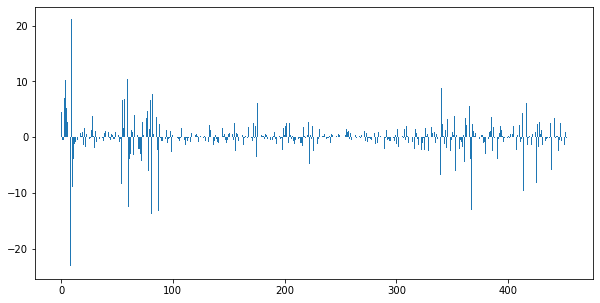

In [42]:
# Ridge regresija

# Inicijalizacija
ridge_model = Ridge(alpha=5)

# Obuka modela
ridge_model.fit(x_inter_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

c:\users\mvikic\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2285274.7469183933, tolerance: 3233.7199200151763
  positive)


Mean squared error:  151.1099031136498
Mean absolute error:  8.956380655332712
Root mean squared error:  12.29267680831355
R2 score:  0.8507227752841778
R2 adjusted score:  0.8485424941099087
        y      y_pred
0    59.0   51.636962
1    18.0   24.664234
2    55.0   41.992750
3    41.0   41.819396
4    41.0   36.598999
5    79.0   72.092512
6    28.0   20.216570
7    72.0  104.805588
8    63.0   48.678739
9    13.0   12.407937
10   46.0   53.744119
11   28.0   41.000829
12   60.0   67.193466
13   53.0   57.731454
14  105.0   98.658282
15    8.0    7.940140
16   49.0   51.883039
17   17.0   24.200106
18   69.0  100.251187
19   15.0   23.536987
Koeficijenti:  [ 4.48972600e+00 -6.15430068e-01 -4.93180265e-01  7.08071654e+00
  1.11260217e+01  4.71500551e+00  2.74913381e+00  1.27475408e+01
 -2.34988898e+01  2.12422121e+01 -9.06841410e+00 -3.75975293e+00
 -1.23945381e+00 -8.67760378e-01  7.04332058e-02 -4.98546046e-01
  1.93453003e-01  5.70942731e-01  2.67721455e-01  8.53854433e-01
 -1.50

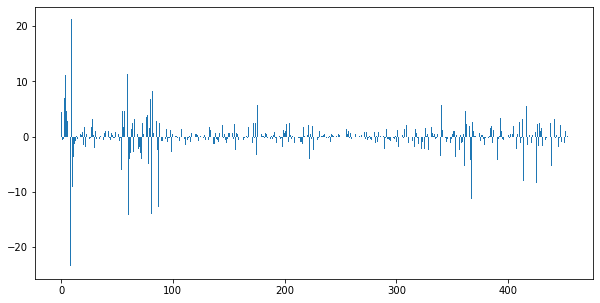

In [43]:
# Lasso regresija

# Model initialization
lasso_model = Lasso(alpha=0.001)

# Fit the data(train the model)
lasso_model.fit(x_inter_train, y_train)

# Predict
y_predicted = lasso_model.predict(x_inter_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("Koeficijenti: ", lasso_model.coef_)

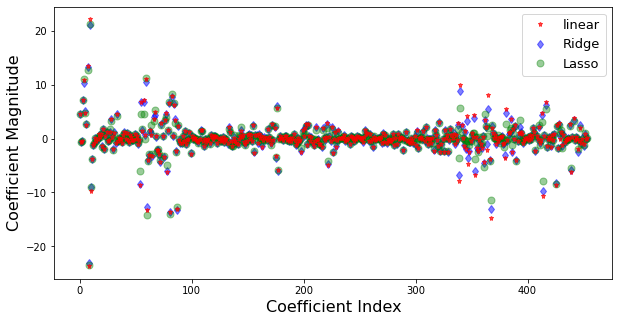

In [44]:
plt.figure(figsize=(10,5))
plt.plot(regression_model_degree.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'linear',zorder=7) # zorder for ordering the markers
plt.plot(ridge_model.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge') # alpha here is for transparency
plt.plot(lasso_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Lasso')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='best')